### 의료 비용 개인 데이터 세트
##### 선형 회귀를 이용한 보험 예측

https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

나이: 1차 수혜자의 나이

성별: 보험 계약자 성별, 여성, 남성

bmi: 신체에 대한 이해를 제공하는 체질량 지수, 신장에 비해 상대적으로 높거나 낮은 체중, 신장
과 체중의 비율을 이용한 객관적인 체중 지수(kg/m^2), 이상적으로는 18.5~24.9

children: 건강보험이 적용되는 자녀 수 / 피부양자 수

흡연자: 흡연

지역: 수혜자의 미국 거주 지역, 북동부, 남동부, 남서부, 북서부.

요금: 건강 보험에서 청구하는 개별 의료 비용

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/PC/Desktop/개발/my_study/my_study/Python_Study/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# 어떤 정보?
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# 크기
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# 결측치 확인
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 어떤 정보? object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# object 변경
df_in=df.copy()

In [ ]:
# object 변환
df_in['sex']=df_in["sex"].replace({'female':0, 'male':1})
df_in['smoker']=df_in["smoker"].replace({'no':0, 'yes':1})
df_in['region']=df_in["region"].replace({'northeast':0, 'southeast':1, 'southwest':2, 'northwest':3 })
df_in

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


In [ ]:
# 변경완료
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df_in.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

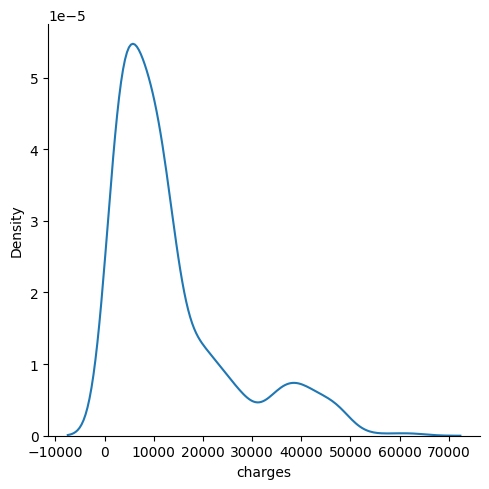

In [ ]:
# KDE(커널밀도추정)시각화
sns.displot(df_in, x='charges', kind='kde') # charges 곡선으로 시각화

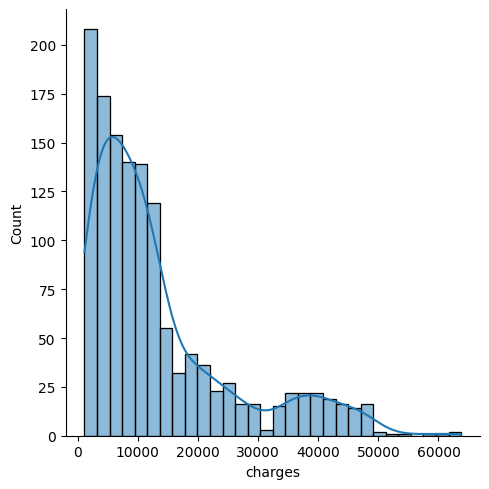

In [ ]:
sns.displot(df_in, x='charges', kde=True) # 특정값이 과하게 크다면 kde 그래프가 데이터를 제대로 나타내지 못하는 것

In [ ]:
df_in['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [ ]:
df_in['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

<Axes: >

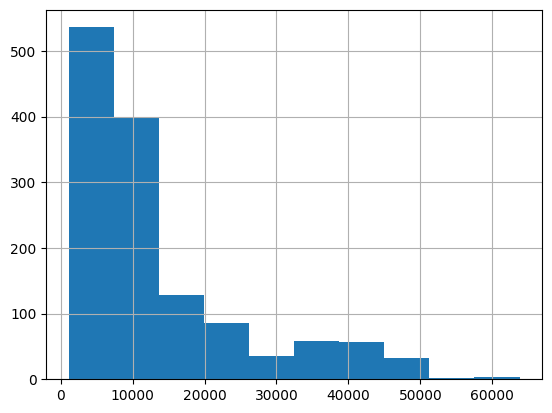

In [ ]:
df_in['charges'].hist()

In [ ]:
df_in['log_charges'] = np.log(df_in['charges'])

<Axes: >

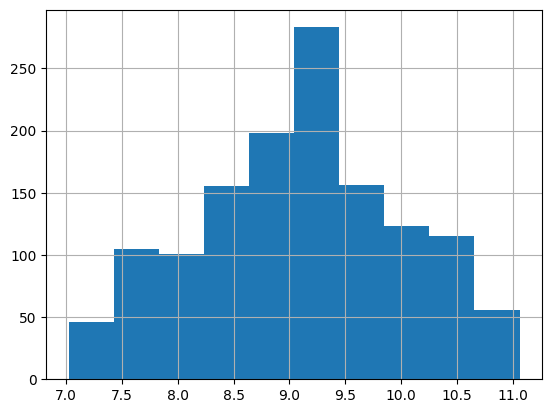

In [ ]:
df_in['log_charges'].hist()

<Axes: >

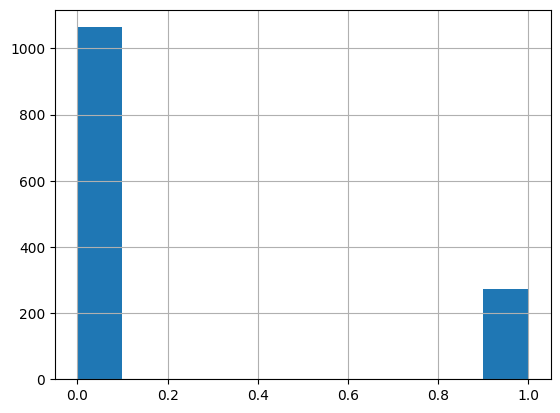

In [ ]:
df_in['smoker'].hist()

<Axes: >

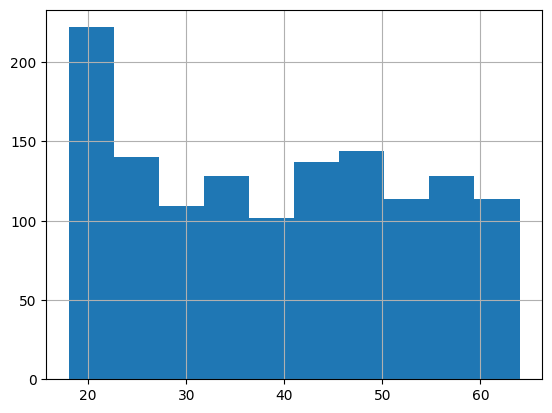

In [ ]:
df_in['age'].hist()

<Axes: >

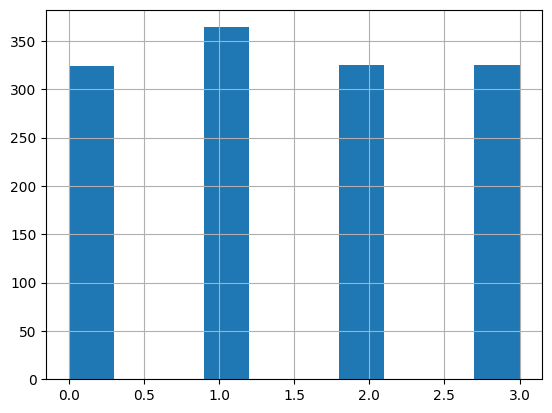

In [ ]:
df_in['region'].hist()

<Axes: >

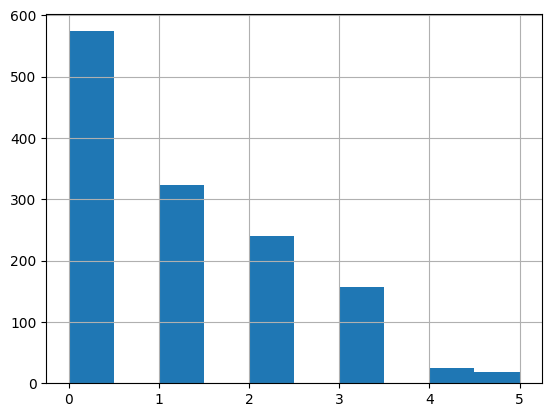

In [ ]:
df_in['children'].hist()

In [ ]:
df_in.describe()

,age,sex,bmi,children,smoker,region,charges,log_charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.486547,13270.422265,9.098659
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237,0.919527
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,7.022756
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,8.463853
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000,9.146552
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,9.719558
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,11.063045


In [ ]:
df_in['log_charges'] = np.log(df_in['charges'])

In [ ]:
# 관계성 알아보기
corr=df_in.corr() # 열끼리 상관관계
corr.shape

(8, 8)

In [ ]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   int64  
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   int64  
 5   region       1338 non-null   int64  
 6   log_charges  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df_in.drop('charges', axis=1, inplace=True)

KeyError: "['charges'] not found in axis"

In [ ]:
df_in=df_in[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'log_charges']]
corrMatt = df_in.corr()
print(corrMatt)
mask = np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)] = False 

                  age       sex       bmi  children    smoker    region   
age          1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002613  \
sex         -0.020856  1.000000  0.046371  0.017163  0.076185 -0.009346   
bmi          0.109272  0.046371  1.000000  0.012759  0.003750 -0.054428   
children     0.042469  0.017163  0.012759  1.000000  0.007673  0.036617   
smoker      -0.025019  0.076185  0.003750  0.007673  1.000000 -0.044124   
region       0.002613 -0.009346 -0.054428  0.036617 -0.044124  1.000000   
log_charges  0.527834  0.005632  0.132669  0.161336  0.665506 -0.046727   

             log_charges  
age             0.527834  
sex             0.005632  
bmi             0.132669  
children        0.161336  
smoker          0.665506  
region         -0.046727  
log_charges     1.000000  


<Axes: >

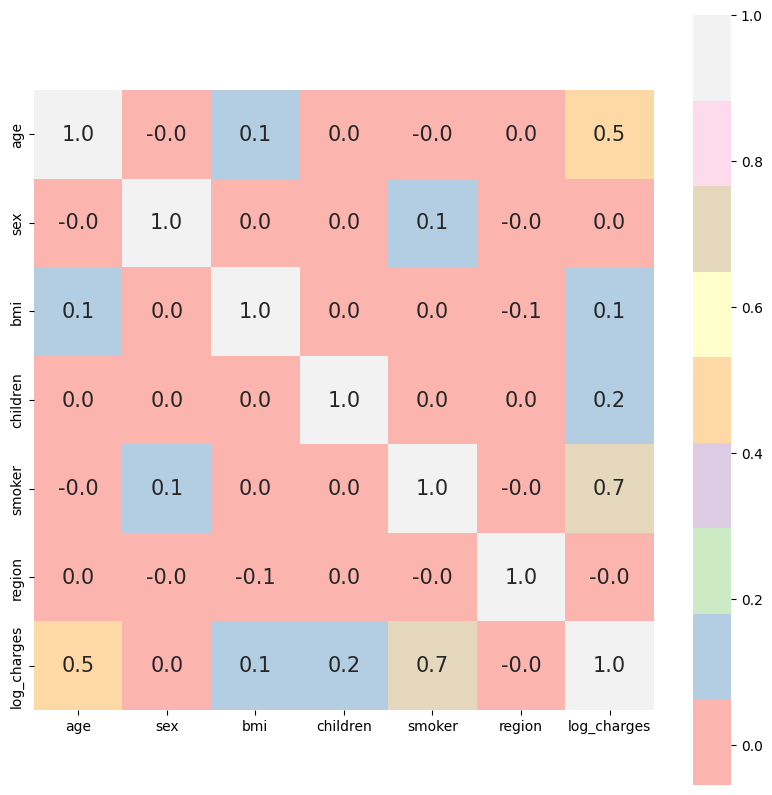

In [ ]:
plt.figure(figsize=(10,10)) # 히트맵그리기
sns.heatmap(corrMatt, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Pastel1')
# 컬러바표시, 정사각형 히트맵, 왜?소수점아래 한자리까지?, 히트맵의상관관계값

<Axes: xlabel='region', ylabel='log_charges'>

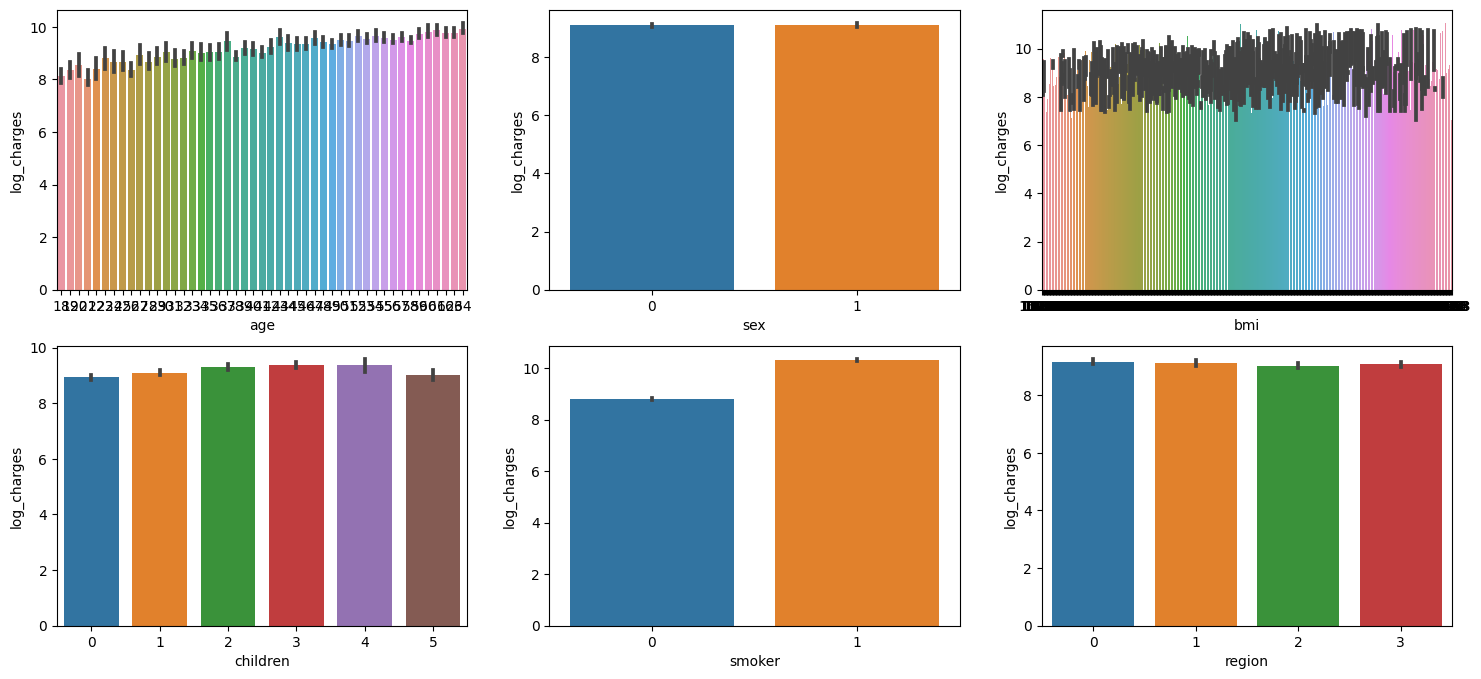

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.barplot(data=df_in,x='age',y='log_charges',ax=ax1)
sns.barplot(data=df_in,x='sex',y='log_charges',ax=ax2)
sns.barplot(data=df_in,x='bmi',y='log_charges',ax=ax3)
sns.barplot(data=df_in,x='children',y='log_charges',ax=ax4)
sns.barplot(data=df_in,x='smoker',y='log_charges',ax=ax5)
sns.barplot(data=df_in,x='region',y='log_charges',ax=ax6)

<Axes: xlabel='region', ylabel='log_charges'>

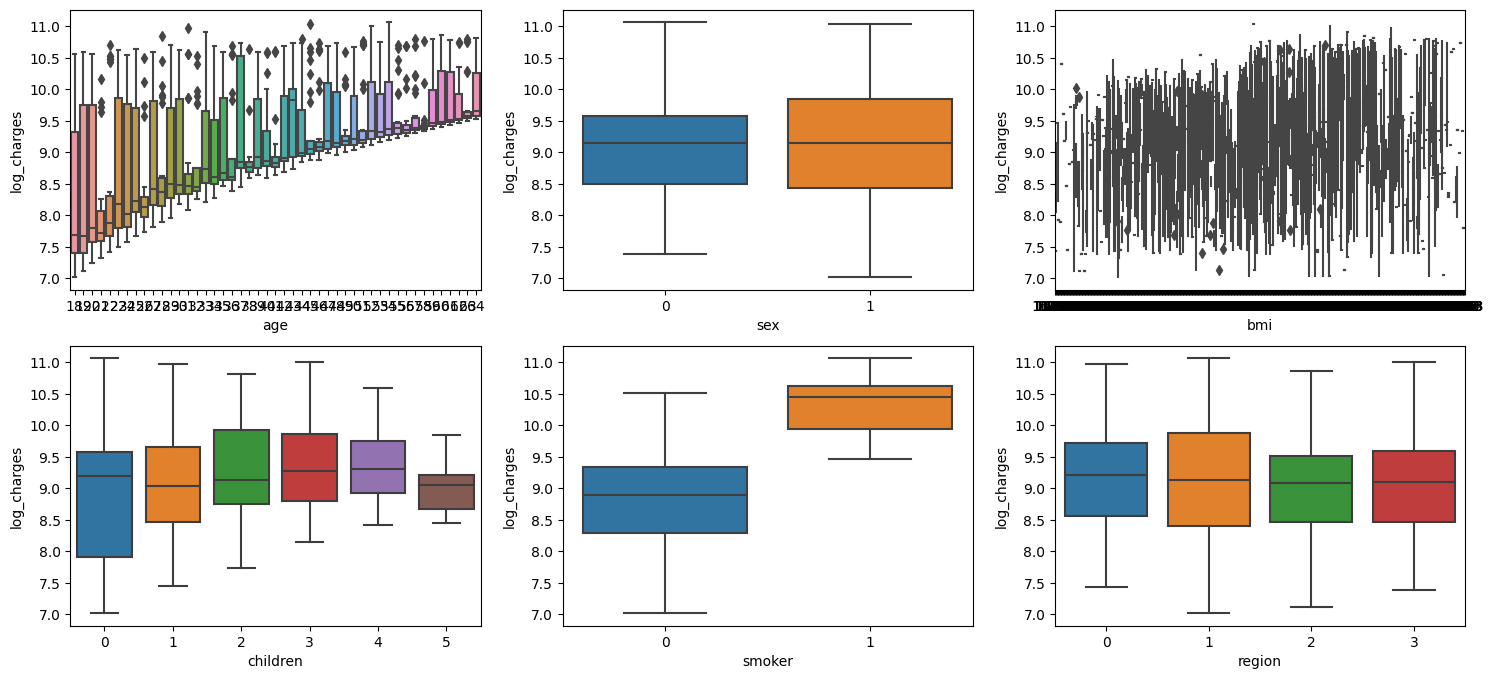

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.boxplot(data=df_in,y='log_charges',x='age', orient='v', ax=axes[0][0])
sns.boxplot(data=df_in,y='log_charges',x='sex', orient='v', ax=axes[0][1])
sns.boxplot(data=df_in,y='log_charges',x='bmi', orient='v', ax=axes[0][2])
sns.boxplot(data=df_in,y='log_charges',x='children', orient='v', ax=axes[1][0])
sns.boxplot(data=df_in,y='log_charges',x='smoker', orient='v', ax=axes[1][1])
sns.boxplot(data=df_in,y='log_charges',x='region', orient='v', ax=axes[1][2])

<Axes: xlabel='region', ylabel='log_charges'>

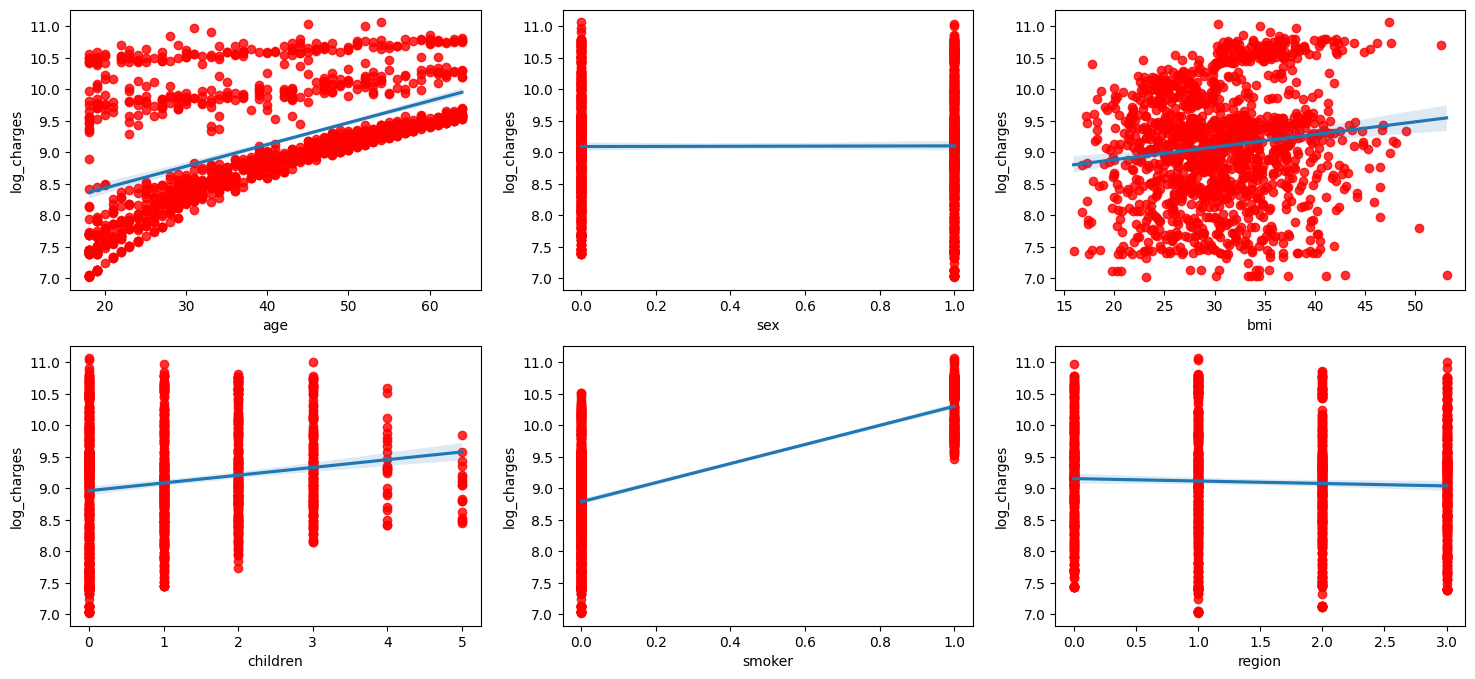

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.regplot(x='age',y='log_charges',data=df_in,ax=axes[0][0], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='sex',y='log_charges',data=df_in, ax=axes[0][1], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='bmi',y='log_charges',data=df_in, ax=axes[0][2], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='children',y='log_charges',data=df_in, ax=axes[1][0], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='smoker',y='log_charges', data=df_in, ax=axes[1][1], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='region',y='log_charges', data=df_in, ax=axes[1][2], scatter_kws={"fc":"r", "ec":"r"})

- 개인 보험 비용 가설
  1. 나이
  2. 성별
  3. bmi
  4. 피부양자(자녀)
  5. 흡연자
  6. 지역

In [ ]:
df_in_data=df_in.drop('log_charges',axis=1)
df_in_target=df_in['log_charges']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in_data,
                                                    df_in_target,
                                                    test_size = 0.2,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

df_lr = LinearRegression()
df_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 알고리즘이 예측한 값과 실제 정답과의 차이를 의미한다.
# MAE : 실제 값과 예측 값의 차이
# MSE : 실제값과 예측값 차이를 제곱해 평균화
# RMSE : MSE 루트값

y_preds = df_lr.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_preds)
mae = mean_absolute_error(y_train, y_preds)
rmse = np.sqrt(mean_squared_error(y_train, y_preds))
r2 = r2_score(y_train, y_preds)

print(f"MSE : {mse : 0.2f}, RMSE : {rmse : 0.3f}, MAE : {mae : 0.3f}")
print(f"예측 R2 값 : {r2: 0.3f}\n")

MSE :  0.20, RMSE :  0.452, MAE :  0.285
예측 R2 값 :  0.754



In [ ]:
y_preds = df_lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2 = r2_score(y_test, y_preds)

print(f"MSE : {mse : 0.2f}, RMSE : {rmse : 0.3f}, MAE : {mae : 0.3f}")
print(f"예측 R2 값 : {r2: 0.3f}")

MSE :  0.18, RMSE :  0.426, MAE :  0.274
예측 R2 값 :  0.799


In [ ]:
df_lr.coef_	# 회귀직선의 기울기

array([ 0.03433939, -0.07192841,  0.01140296,  0.09340414,  1.54827052,
       -0.01613734])

In [ ]:
df_lr.intercept_	# 절편

7.052220844812566

In [ ]:
import statsmodels.api as sm

model = sm.OLS(df_in_target,df_in_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            log_charges   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.140e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):                        0.00
Time:                        02:26:25   Log-Likelihood:                         -2212.2
No. Observations:                1338   AIC:                                      4436.
Df Residuals:                    1332   BIC:                                      4468.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0667      0.002     28.993      0.000       0.062       0.071
sex            0.2410      0.069      3.494      0.000       0.106       0.376
bmi            0.1679      0.003     49.175      0.000       0.161       0.175
children       0.2134      0.029      7.460      0.000       0.157       0.270
smoker         1.8197      0.086     21.202      0.000       1.651       1.988
region         0.2733      0.030      9.020      0.000       0.214       0.333
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.280
Skew:                           0.030   Prob(JB):                        0.869
Kurtosis:                       2.963   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Notes:

$R^2$의 값이 0.981으로 모델의 설명력이 높은 것을 확인할 수 있음.  또한 $Adj.R^2$이 0.981로 높음. 

F-statistic은 11400.으로 이 모형이 통계적으로 유의미함을 알 수 있음.

P값을 보면 통계적으로 유의미함을 알 수 있음.

Durbin-Watson 통계량이 1.986으로 2에 가까워 오차항의 독립성이 만족함을 알 수 있음.

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

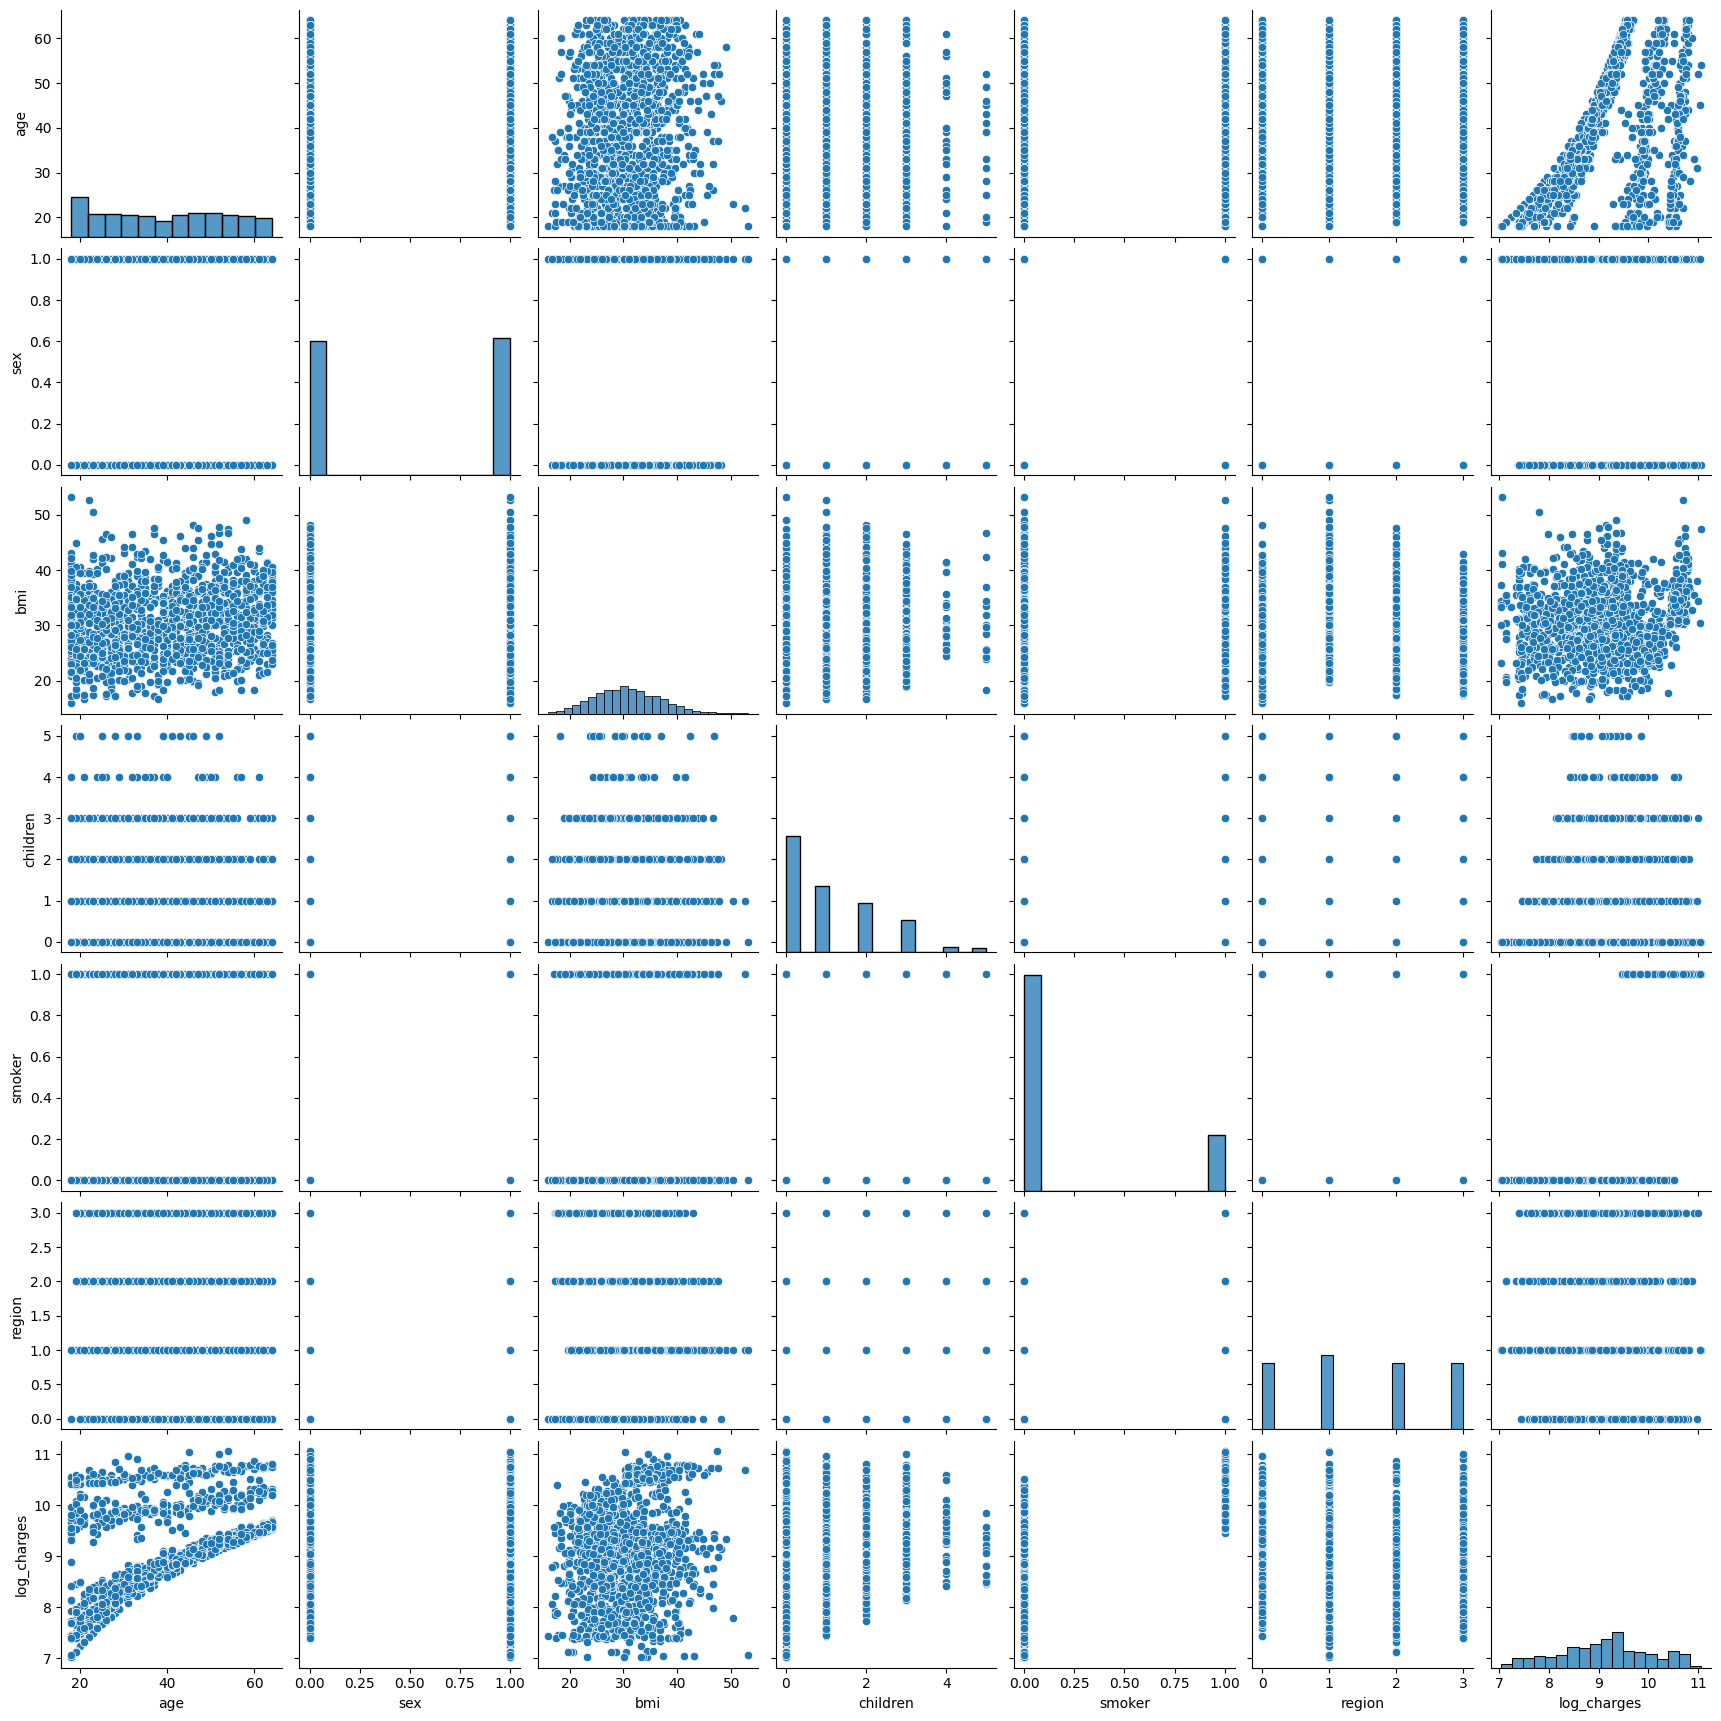

In [ ]:
sns.pairplot(df_in)

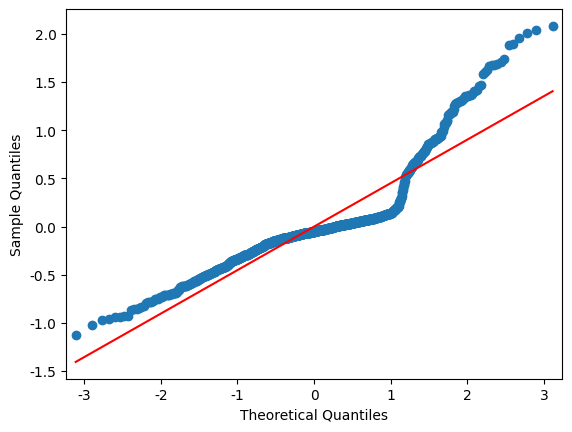

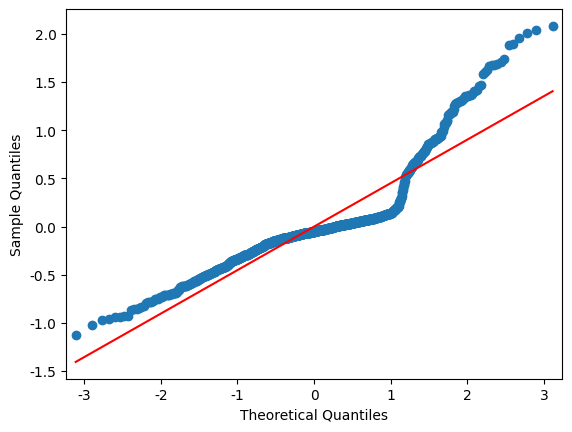

In [ ]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False
sm.ProbPlot(model_residuals).qqplot(line='s')

https://colab.research.google.com/drive/15ONbuLEBeeD9XoMWUoNmtQj90gblhjIx#scrollTo=Bq0WHdl2HpwB

https://colab.research.google.com/drive/11865yzohGm76VucxDbf3x9ELOeRzmRBO?usp=sharing

- 미국 의료보험 제도
  - https://m.blog.naver.com/mylktv/221785475375
- BMI
  - https://www.sedaily.com/NewsView/29N6C74QA0
-  